In [1]:
# ignore if the module is installed in path
import sys
sys.path.append("../")

# import main module
from rppca import Design, randomized_svd

# numerical ingredients
import numpy as np
import pandas as pd
import scipy.io as io

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
AInv = io.mmread('../datasets/pedAInv.mtx')
LInv = io.mmread('../datasets/pedLInv.mtx')
pop_label = pd.read_csv('../datasets/popLabel.csv').x

In [3]:
# naive SVD
%time A = np.linalg.inv(AInv.toarray())
%time u, s, v = np.linalg.svd(A, full_matrices=False)

CPU times: user 16min 25s, sys: 3min 48s, total: 20min 13s
Wall time: 24.2 s
CPU times: user 56min 42s, sys: 2h 14min 54s, total: 3h 11min 36s
Wall time: 3min 43s


In [4]:
# new implementation
%time design = Design(LInv.tocsc())
%time U, S, V = randomized_svd(design, n_components=10, n_iter=5, seed=0)

CPU times: user 0 ns, sys: 4.16 ms, total: 4.16 ms
Wall time: 3.35 ms
CPU times: user 5.26 s, sys: 11.4 s, total: 16.7 s
Wall time: 400 ms


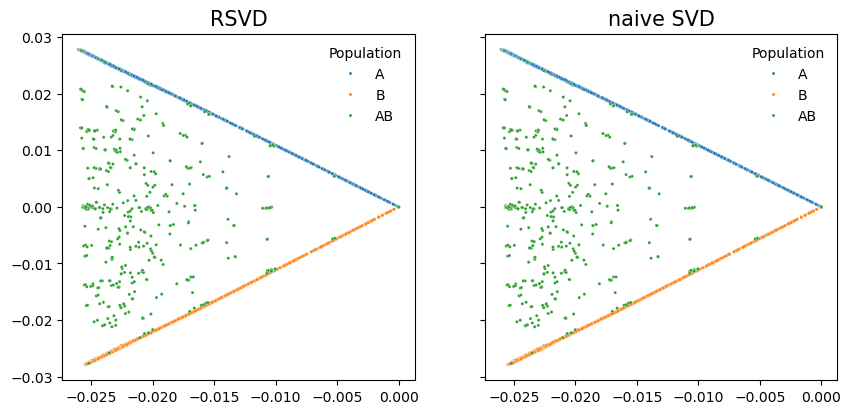

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10,4.5), sharex=True, sharey=True)

# RSVD 
ax[0].set_title('RSVD', fontsize=15)
sns.scatterplot(x=U[:,0], y=U[:,1], s=5, hue=pop_label, ax=ax[0])

# naive SVD
ax[1].set_title('naive SVD', fontsize=15)
sns.scatterplot(x=u[:,0], y=u[:,1], s=5, hue=pop_label, ax=ax[1])

ax[0].legend(title='Population', frameon=False)
ax[1].legend(title='Population', frameon=False)

plt.show()